# Local development server


## When you need this?¶
For quick tests of Syft functionalities or experimenting with your server setup before deploying, a local development server can be extremely useful. These development servers function like in-memory servers, offering easy launch and tear-down capabilities. 

This local development server has its own SQLite storage to keep the server's metadata and data, and it has the same name as the server's unique name. If you launch a server with an exsiting storage, that will be loaded together, which means you can use across longer development cycles.

## Steps

To deploy a local development server, you only need syft, which comes together with a special module, called `orchestra`. Via `orchestra`, you can experiment with a single server deployment or even simulate container workloads.

### Installation

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Python Version</p>
Please make sure you have Python 3.10+ installed and available.</div>    


```bash 
pip install -U syft
```

### Launch a development server

In [2]:
import syft as sy

server = sy.orchestra.launch(
    name="my_special_server",
    reset=True,
    port=8093,
)

Starting my_special_server server on 0.0.0.0:8093
 Done.


SyftInfo: You have launched a development server at http://0.0.0.0:8093.It is intended only for local use.

In [5]:
server.deployment_type

<DeploymentType.PYTHON: 'python'>

The returned object, a `sy.ServerHandle`, allows fetching specific information about your deployed local server, such as the `url` or the `deployment_type`. Here, the deployment type is *PYTHON* as the server is running in a process in Python. It is good to know that `sy.orchestra` allows users to experiment with further local containerised deployment as well, but more of this will be covered soon. 


Multiple further APIs are available that are also offered on the client, for easy testing, such as `register`, `login_as_guest`, etc.

In [3]:
server.url

'http://localhost'

INFO:     Started server process [47430]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
ERROR:    [Errno 48] error while attempting to bind on address ('0.0.0.0', 8093): address already in use
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.


In [4]:
server.port

8093

Further arguments can be passed to configure the way you would like to use your development server:
- `dev_mode`: True/False, whether you would like verbose logging when using the server for debugging
- `server_type`: `enclave`, `domain` or `gateway`
- `server_side_type`: `high` or `low`, stating whether your server is purposed to host private data (`high`) or only mock data (`low`). A high side server is more defensive with how the data is being used.
- `local_db`: True/False, whether you would like to initialize a local database or not
- `create_producer`: True/False, whether your server can instantiate other in-memory server to simulate working with multiple containers
- `n_consumers`: number of in-memory workers simulated, able to consume the workload scheduled. This is required for launching and running jobs and requires `create_producer` to be `True`.
- `thread_workers`: True/False, whether the in-memory workers should be simulated using threads
- `association_request_auto_approval`: True/False,  states whether you should auto-approve requests of associating with another server (e.g. routing from one to another)

or from the command line:
`$ syft launch --name=my-server --port=8080 --reset=True`

#### Access Client and Login

Stopping process on port: 8093
Process 88115 terminated.


/api/v2/metadata


INFO:     Started server process [17552]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8093 (Press CTRL+C to quit)


INFO:     127.0.0.1:51529 - "GET /api/v2/metadata HTTP/1.1" 200 OK
INFO:     127.0.0.1:51529 - "POST /api/v2/login HTTP/1.1" 200 OK
INFO:     127.0.0.1:51529 - "GET /api/v2/api?verify_key=3fd1228a31a8035a433f1ad5fa446c2a92efa0ed32dad2b84ef30d25640c5739&communication_protocol=dev HTTP/1.1" 200 OK
INFO:     127.0.0.1:51530 - "POST /api/v2/api_call HTTP/1.1" 200 OK
Logged into <my_special_server: High side Domain> as <info@openmined.org>


SyftWarning: You are using a default password. Please change the password using `[your_client].me.set_password([new_password])`.

INFO:     127.0.0.1:51531 - "POST /api/v2/api_call HTTP/1.1" 200 OK


<DomainClient: my_special_server>
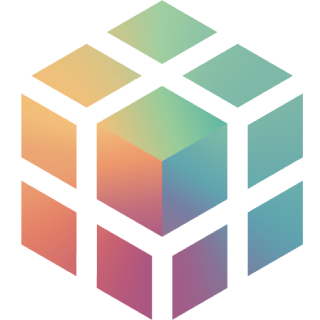

In [4]:
data_owner_client = sy.login(url="localhost:8093", email="info@openmined.org", password="changethis")
data_owner_client

#### Landing (shutting down) of the server

In [7]:
server.land()

Stopping my_special_server


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [17552]


More information on how to use this Datasite server in the [Datasite guide](../components/datasite-server.ipynb) and within the [components section](../components/intro.ipynb).